In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/mushrooms.csv")
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
for i in df.columns:
    df[i] = la.fit_transform(df[i])

In [10]:
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5


<Axes: >

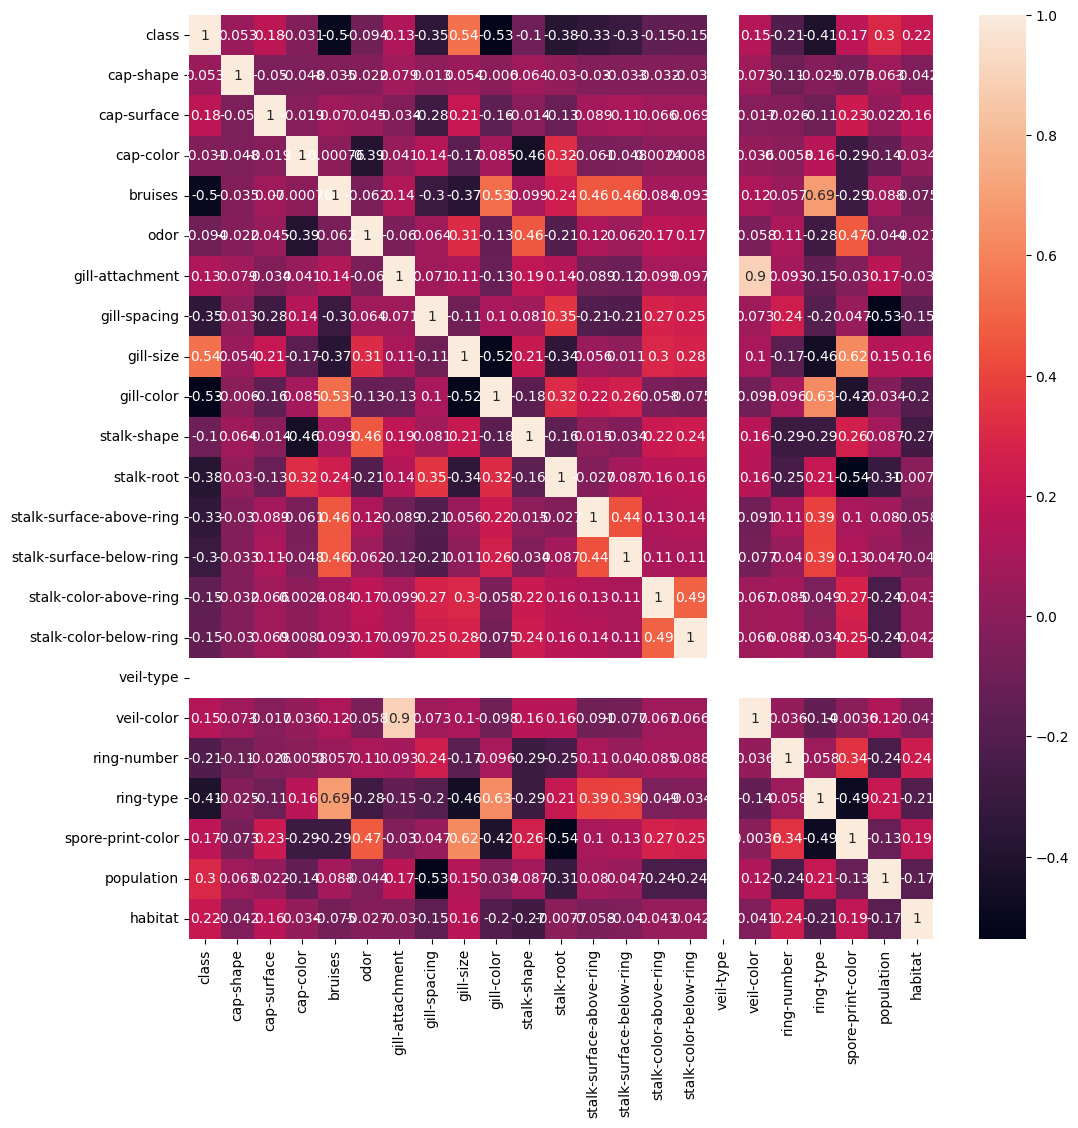

In [12]:
import seaborn as sns
df1= df.corr()
plt.subplots(figsize=(12, 12))
sns.heatmap(df1, annot=True)

In [13]:
df.drop('veil-type', inplace = True, axis=1)
df.drop('cap-shape', inplace = True, axis=1)
df.drop('cap-color', inplace = True, axis=1)

In [14]:
df.corr()

,class,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.178446,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-surface,0.178446,1.000000,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
bruises,-0.501530,0.070228,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,0.045233,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,-0.034180,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,-0.282306,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.208100,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.161017,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972
stalk-shape,-0.102019,-0.014123,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,-0.163422,0.015193,-0.034399,0.223439,0.235794,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216
stalk-root,-0.379361,-0.126245,0.244188,-0.205215,0.144063,0.350548,-0.344345,0.315080,-0.163422,1.000000,-0.027065,0.087454,0.157140,0.159805,0.156213,-0.247357,0.210155,-0.536996,-0.306747,-0.007668


In [15]:
df.isnull().sum()

class                       0
cap-surface                 0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [17]:
df.duplicated().sum()

6544

In [19]:
df.shape

(8124, 20)

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'] , axis = 1)
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print(X_test.shape , X_train.shape , X.shape)

(2031, 19) (6093, 19) (8124, 19)


In [22]:
from sklearn import linear_model
linr = linear_model.LogisticRegression(max_iter=1000)
linr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
linr_pred_train = linr.predict(X_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logr_accuracy = accuracy_score(y_train, linr_pred_train)
logr_precision = precision_score(y_train, linr_pred_train)
logr_recall = recall_score(y_train, linr_pred_train)
logr_f1 = f1_score(y_train, linr_pred_train)
print(f"Accuracy: {logr_accuracy:.2f}")
print(f"Precision: {logr_precision:.2f}")
print(f"Recall: {logr_recall:.2f}")
print(f"F1-Score: {logr_f1:.2f}")


Accuracy: 0.95
Precision: 0.96
Recall: 0.94
F1-Score: 0.95


In [25]:
logr_pred = linr.predict(X_test)

In [26]:
logr_pred[:5]

array([0, 1, 1, 0, 1])

In [28]:
y_test[:5]

2853    0
1031    1
5891    1
7325    0
7138    1
Name: class, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
rf_pred = rf_model.predict(X_test)

In [31]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [32]:
rf_pred[:10]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [33]:
y_test[:10]

2853    0
1031    1
5891    1
7325    0
7138    1
1776    0
7953    0
5420    0
5969    1
7547    0
Name: class, dtype: int64